# Evaluation report for forecasting_dl

## 본 문서에서는 main.py을 이용한 학습/추론 결과에 대한 상세한 평가 결과를 확인할 수 있습니다.

### 지원 기능
#### - Input Asset
- Input dataset 간략히 살펴보기
#### - Readiness Asset
- dataset의 변수 구성 요약
- dataset의 그룹별 시계열 길이 시각화
- dataset의 시계열 그래프 시각화
- 이동 평균 선 비교 시각화
- Target에 대한 ACF Plot와 PACF Plot
- Target에 대한 시계열 분해 시각화
#### - Bizprerocess Asset
- Preprocessd dataset 간략히 살펴보기
- 전처리 이후 dataset의 변수 구성 요약
- 전처리 이후 dataset의 그룹별 시계열 길이 시각화
- 전처리 이후 dataset의 시계열 그래프 시각화
#### - Train Asset
- CV별 평가 점수 비교 시각화
- CV별 실제 값과 예측 값 비교 시각화
#### - Inference Asset
- 예측 결과 살펴보기
- 예측 결과 시각화


In [1]:
import warnings
from copy import copy
warnings.filterwarnings(action='ignore')

In [2]:
%%capture --no-display
from wrapping import Wrapper, EvaluationReport
wrapper = Wrapper();

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/opentype: ca

# Train pipeline

In [3]:
%%capture --no-display
pipeline = 'train_pipeline'
wrapper.run_train_pipeline();

## input asset
----

In [4]:
%%capture --no-display
input_asset_structure = wrapper.get_asset_structure(step=0, pipeline=pipeline);

### input dataset 간략히 살펴보기

In [6]:
print("Input Data Size: {} Rows, {} Columns".format(input_asset_structure.data['dataframe'].shape[0], input_asset_structure.data['dataframe'].shape[1]))

Input Data Size: 787 Rows, 9 Columns


In [6]:
input_asset_structure.data['dataframe'].head(10)

,log_date,shop_name,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),합계 일조시간(hr),solbi_order_amount,baemin_order_amount
0,2023-02-01,전남여수점,4.38,0.03,11.26,0.0,7.39,1575500,177000.0
1,2023-02-01,전남여수점,4.38,0.03,11.26,0.0,7.39,1575500,177000.0
2,2023-02-02,전남여수점,1.23,-2.07,5.79,0.0,6.96,1177500,110000.0
3,2023-02-02,전남여수점,1.23,-2.07,5.79,0.0,6.96,1177500,110000.0
4,2023-02-03,전남여수점,1.56,-1.36,6.21,0.0,7.40,2057500,142000.0
5,2023-02-03,전남여수점,1.56,-1.36,6.21,0.0,7.40,2057500,142000.0
6,2023-02-04,전남여수점,1.69,-2.69,7.38,0.0,9.28,1303500,202000.0
7,2023-02-04,전남여수점,1.69,-2.69,7.38,0.0,9.28,1303500,202000.0
8,2023-02-05,전남여수점,1.58,-5.10,10.13,0.0,9.51,2058500,447000.0
9,2023-02-05,전남여수점,1.58,-5.10,10.13,0.0,9.51,2058500,447000.0


## readiness asset
----

In [5]:
%%capture --no-display
readiness_asset_structure = wrapper.get_asset_structure(step=1, pipeline=pipeline);

### dataset의 변수 구성 요약

In [8]:
evaluationreport = EvaluationReport(asset_structure=readiness_asset_structure)
evaluationreport.summarize_variable_composition(evaluationreport.dataset, evaluationreport.config)

,Component,Count,List
0,Total columns,9,"[shop_name, log_date, baemin_order_amount, 평균기..."
1,Target column,1,[baemin_order_amount]
2,Time column,1,[log_date]
3,X covaiates,6,"[평균기온(°C), 최저기온(°C), 최고기온(°C), 일강수량(mm), 합계 일조..."
4,Groupkey column,1,[shop_name]
5,Static covariates,-,-


### dataset의 그룹별 시계열 길이 시각화

  Statitistic   Value        Example
0         Min      86  킹콩부대찌개(여수웅천점)
1          Q1      86  킹콩부대찌개(여수웅천점)
2      Median     147          여수웅천점
3          Q3     277          전남여수점
4         Max     277          전남여수점
5       Count       3              -
6        Mean   170.0              -
7         Std  79.653              -
8    Skewness   0.409              -
9    Kurtosis    -1.5              -


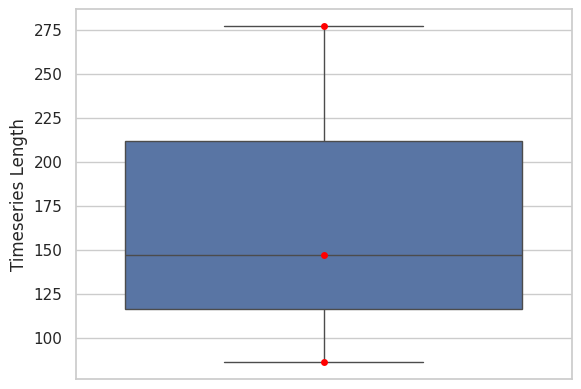

In [9]:
evaluationreport.time_length_per_groupkey(evaluationreport.dataset, evaluationreport.config, show_boxplot=True)

### dataset의 시계열 그래프 시각화

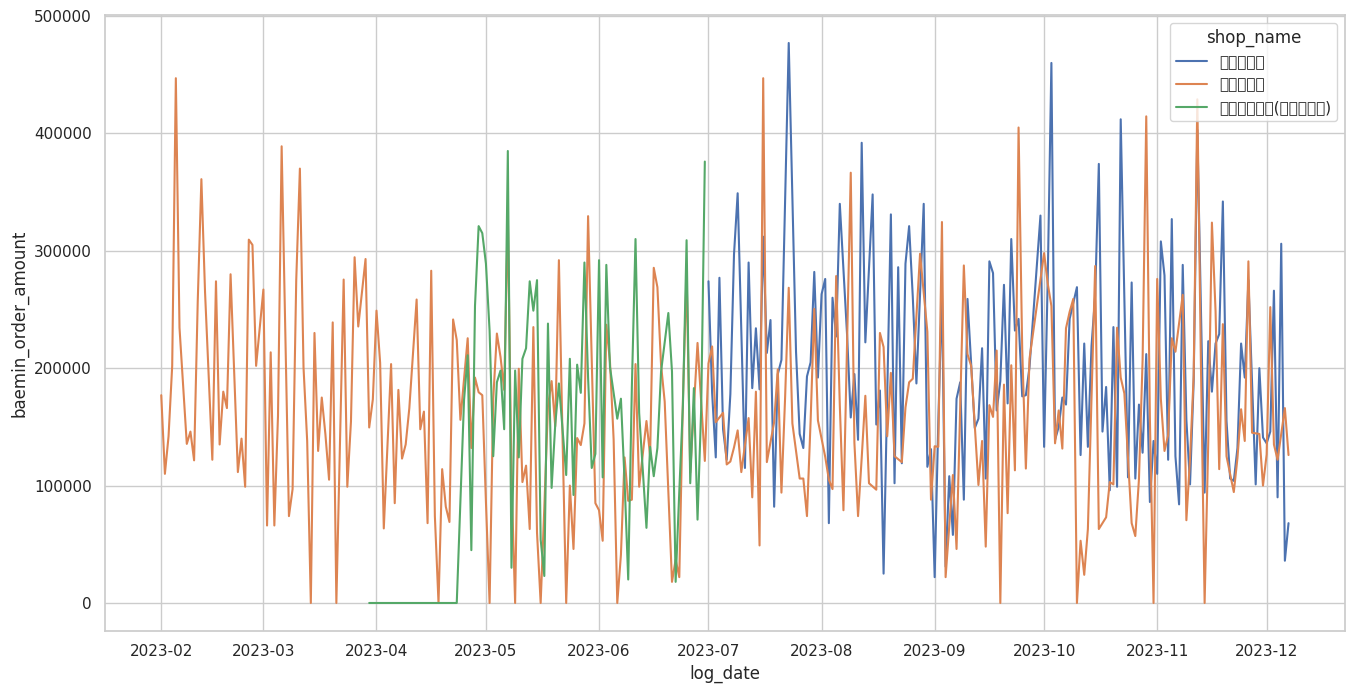

In [10]:
evaluationreport.timeseries_plot(evaluationreport.dataset, evaluationreport.config)

### 이동 평균 선 비교 시각화

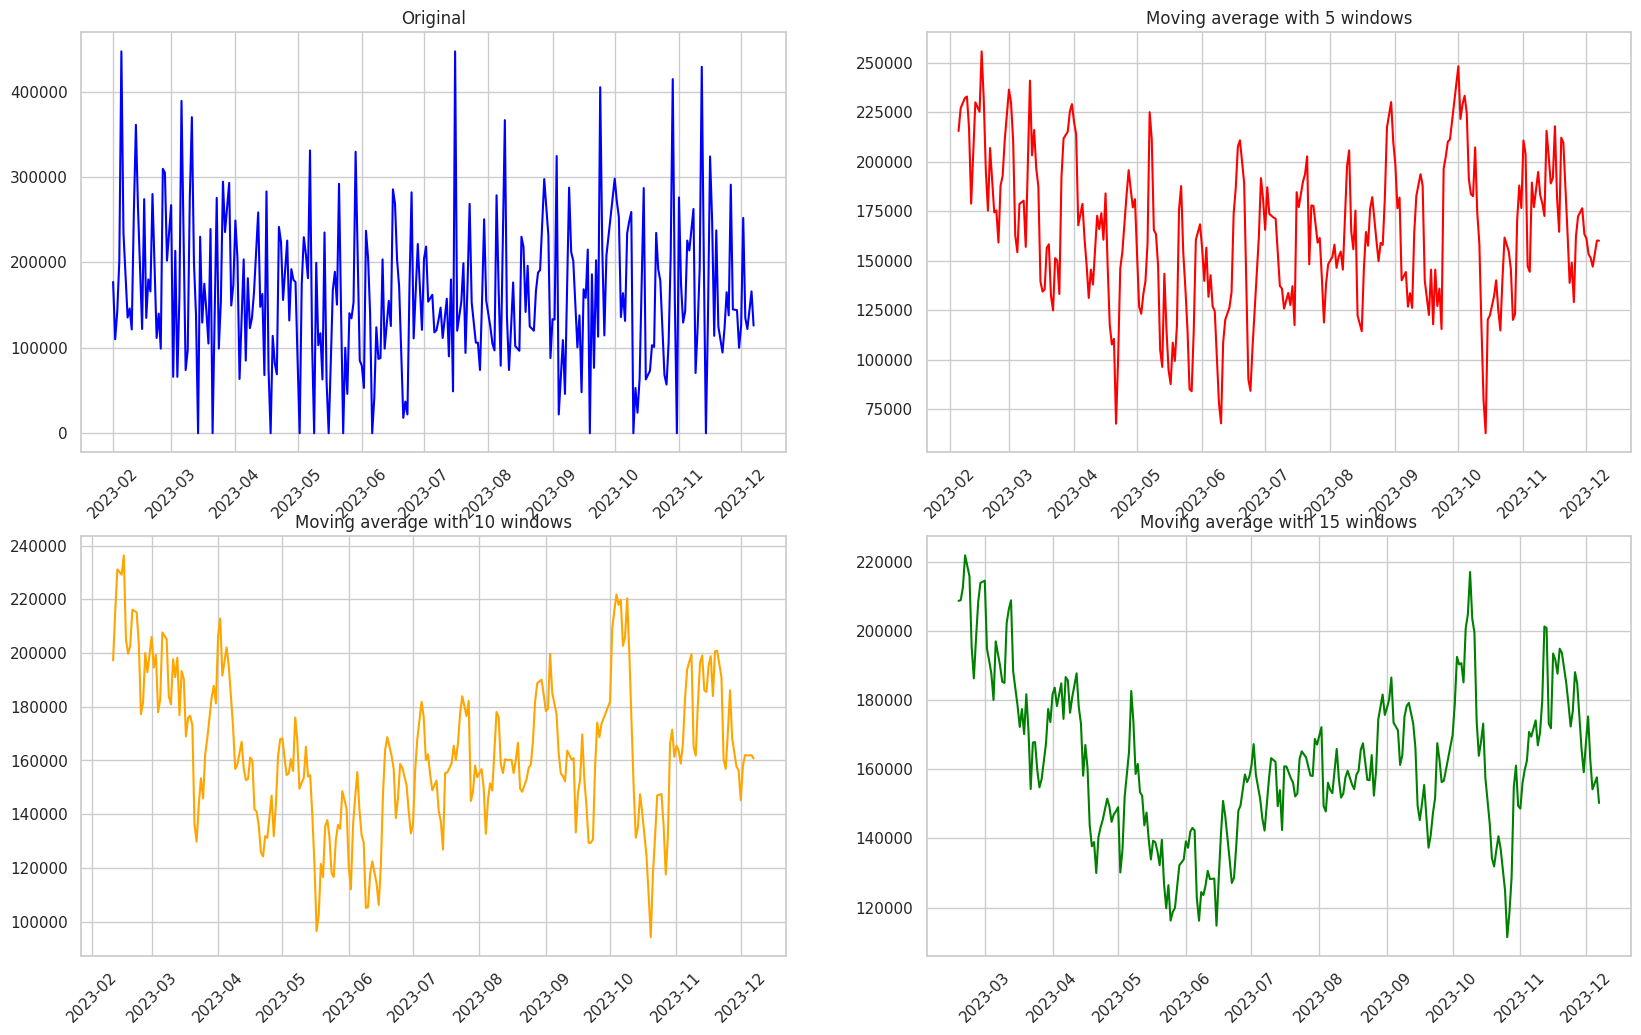

In [11]:
evaluationreport.moving_average_plot(evaluationreport.dataset, 
                                     evaluationreport.config, 
                                     groupkey='전남여수점', 
                                     moving_windows=[5, 10, 15],
                                     show_each=True)

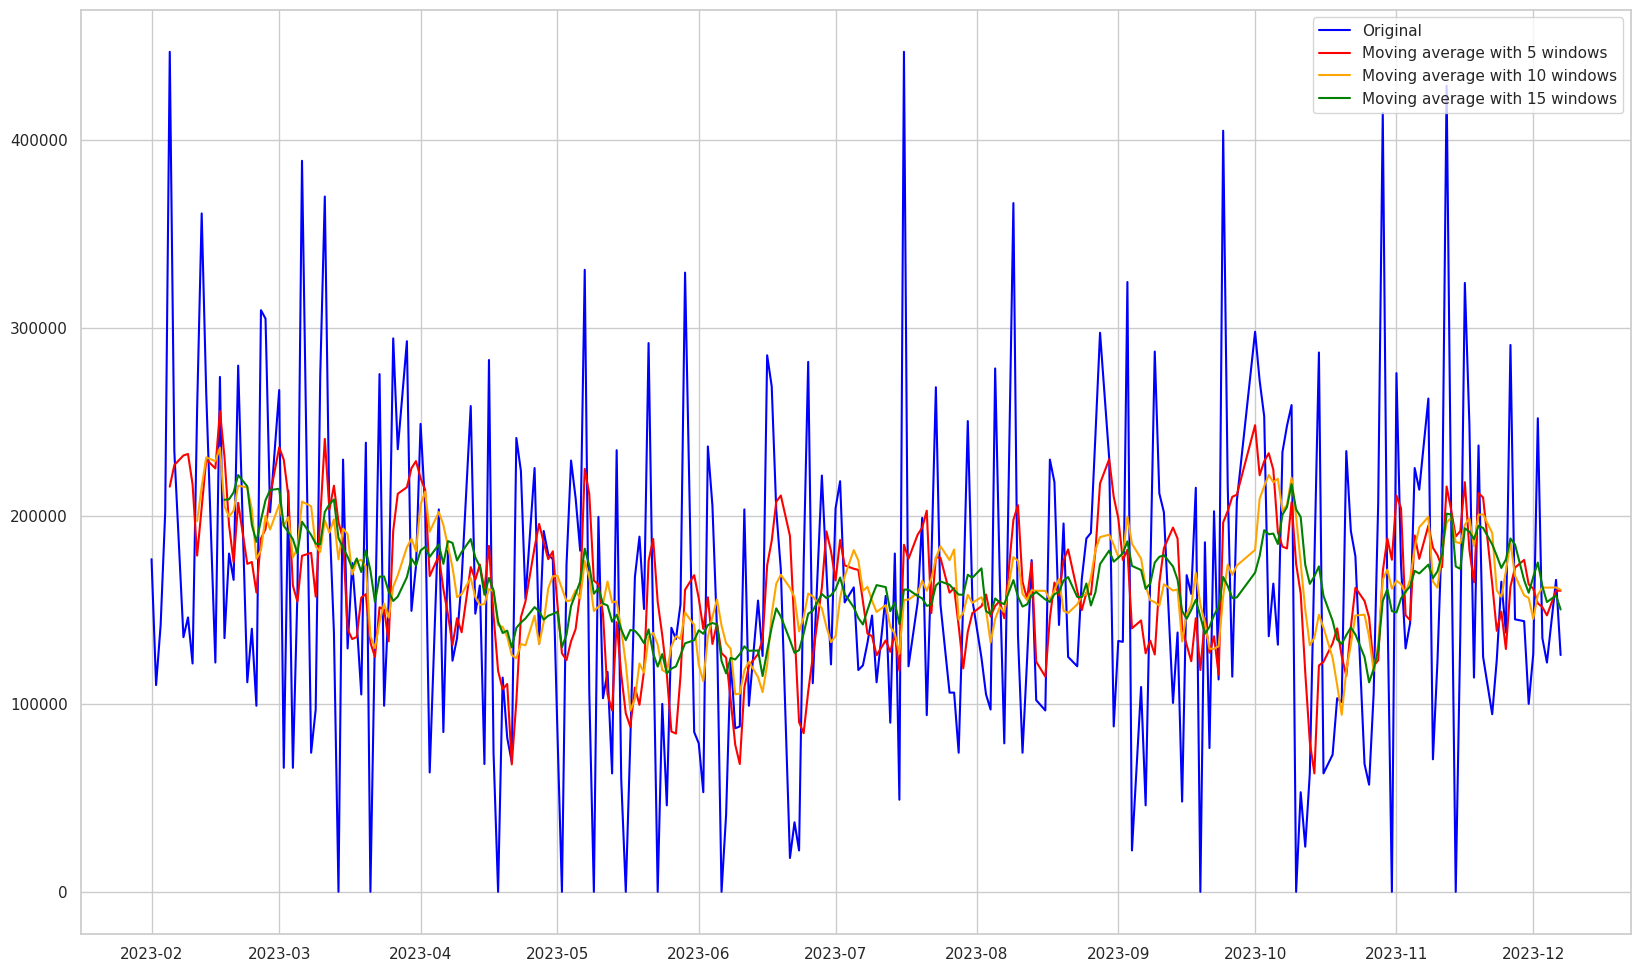

In [12]:
evaluationreport.moving_average_plot(evaluationreport.dataset, 
                                     evaluationreport.config, 
                                     groupkey='전남여수점', 
                                     moving_windows=[5, 10, 15],
                                     show_each=False)

### Target에 대한 ACF Plot와 PACF Plot

ACF: 자기상관함수 (Autocorrelation Function)으로 y_t와 y_(t+k)간 상관 관계를 측정하는 것이다. ACF의 절대값이 커질수록 시차 시계열 데이터의 상관성이 크다고 할 수 있다.  
  
PACF: 편자기상관함수 (Partial Autocorrelation Function)은 y_t와 y_(t+k)간 상관 관계를 측정하는 것은 동일하지만 y_t와 y_(t+k) 사이의 다른 y값의 영향력은 배제하고 측정한다.

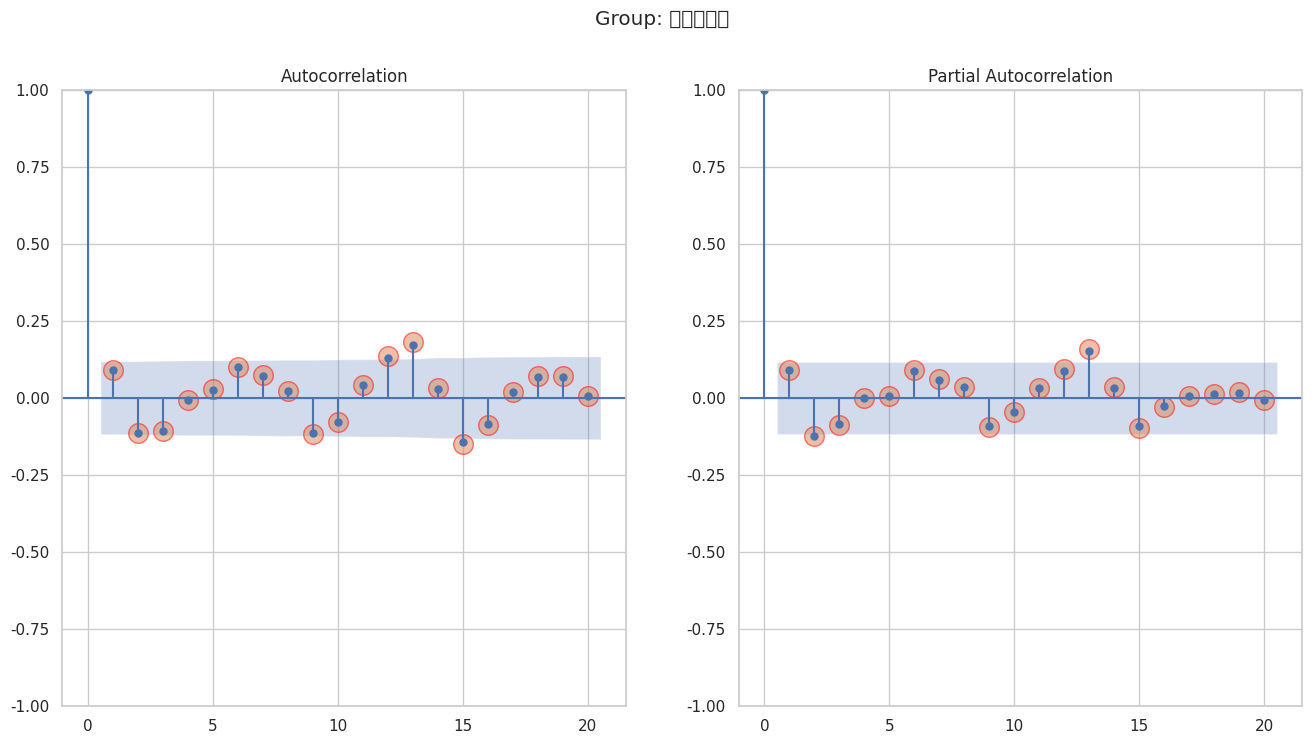

In [13]:
evaluationreport.timeseries_acf_pacf_plot(evaluationreport.dataset, evaluationreport.config, groupkey='전남여수점')

### Target에 대한 시계열 분해 시각화

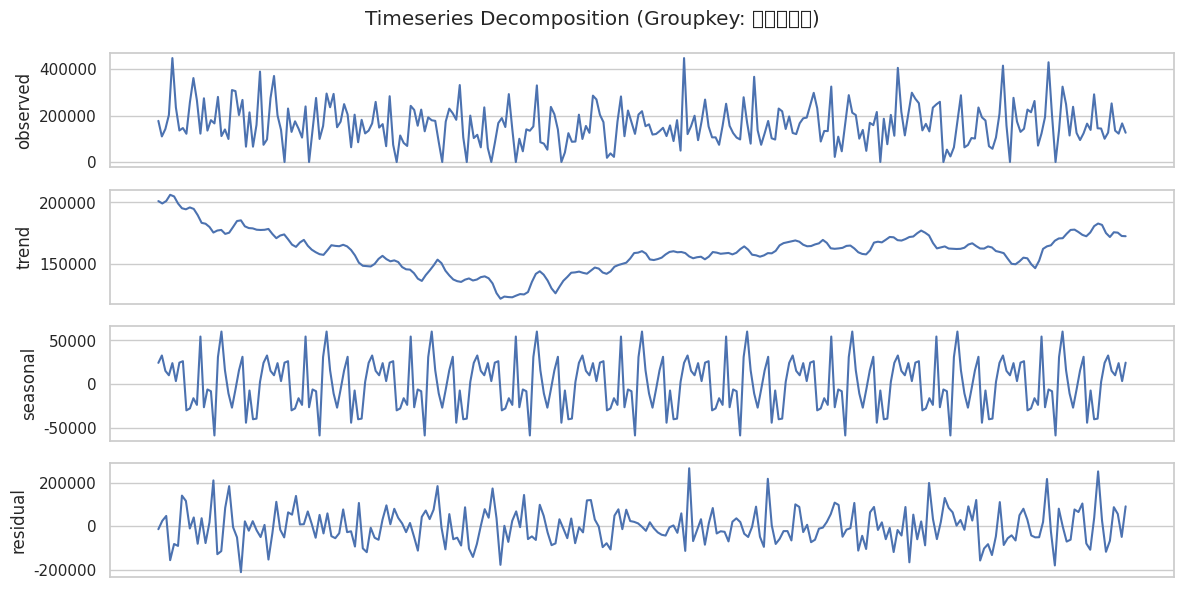

In [14]:
evaluationreport.timeseries_decomposition_plot(evaluationreport.dataset, evaluationreport.config, groupkey='전남여수점', period=30)

## Bizpreprocess asset
----

In [6]:
%%capture --no-display
bizpreprocess_asset_structure = wrapper.get_asset_structure(step=2, pipeline=pipeline);

### Preprocessd dataset 간략히 살펴보기

In [16]:
if bizpreprocess_asset_structure.data['dataframe'].shape[0] != input_asset_structure.data['dataframe'].shape[0]:
    print("The number of rows changed during preprocessing. {} --> {}".format(input_asset_structure.data['dataframe'].shape[0], bizpreprocess_asset_structure.data['dataframe'].shape[0]))
else:
    print("The number of rows did not change during preprocessing.")

if bizpreprocess_asset_structure.data['dataframe'].shape[1] != input_asset_structure.data['dataframe'].shape[1]:
    print("The number of columns changed during preprocessing. {} --> {}".format(input_asset_structure.data['dataframe'].shape[0], bizpreprocess_asset_structure.data['dataframe'].shape[0]))
    column_change = True
else:
    print("The number of columns did not change during preprocessing.")
    column_change = False


The number of rows changed during preprocessing. 787 --> 510
The number of columns did not change during preprocessing.


In [17]:
bizpreprocess_asset_structure.data['dataframe'].head(10)

,shop_name,log_date,baemin_order_amount,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),합계 일조시간(hr),solbi_order_amount
0,여수웅천점,2023-07-01,274000.0,0.811895,0.890063,0.774744,0.004085,0.247373,0.338662
1,여수웅천점,2023-07-02,179000.0,0.833035,0.873886,0.816724,0.000545,0.306386,0.386134
2,여수웅천점,2023-07-03,124000.0,0.843784,0.929019,0.772014,0.118112,0.109135,0.219739
3,여수웅천점,2023-07-04,277000.0,0.793981,0.903268,0.645392,0.147254,0.000000,0.474878
4,여수웅천점,2023-07-05,148000.0,0.849875,0.871905,0.811604,0.247481,0.662894,0.342741
5,여수웅천점,2023-07-06,122000.0,0.837693,0.831628,0.848464,0.000000,0.718674,0.358728
6,여수웅천점,2023-07-07,178000.0,0.791473,0.875867,0.674061,0.395461,0.008084,0.344698
7,여수웅천점,2023-07-08,297000.0,0.828377,0.908221,0.747782,0.052292,0.085691,0.444209
8,여수웅천점,2023-07-09,349000.0,0.864565,0.945857,0.769625,0.028870,0.076799,0.491028
9,여수웅천점,2023-07-11,115000.0,0.859190,0.948168,0.738567,0.082796,0.009701,0.312398


### 전처리 이후 dataset의 변수 구성 요약

In [23]:
if column_change:
    evaluationreport = EvaluationReport(asset_structure=bizpreprocess_asset_structure)
    evaluationreport.summarize_variable_composition(evaluationreport.dataset, evaluationreport.config)

### 전처리 이후 dataset의 그룹별 시계열 길이 시각화

In [24]:
evaluationreport.time_length_per_groupkey(evaluationreport.dataset, evaluationreport.config, show_boxplot=False)

  Statitistic   Value        Example
0         Min      86  킹콩부대찌개(여수웅천점)
1          Q1      86  킹콩부대찌개(여수웅천점)
2      Median     147          여수웅천점
3          Q3     277          전남여수점
4         Max     277          전남여수점
5       Count       3              -
6        Mean   170.0              -
7         Std  79.653              -
8    Skewness   0.409              -
9    Kurtosis    -1.5              -


### 전처리 이후 dataset의 시계열 그래프 시각화

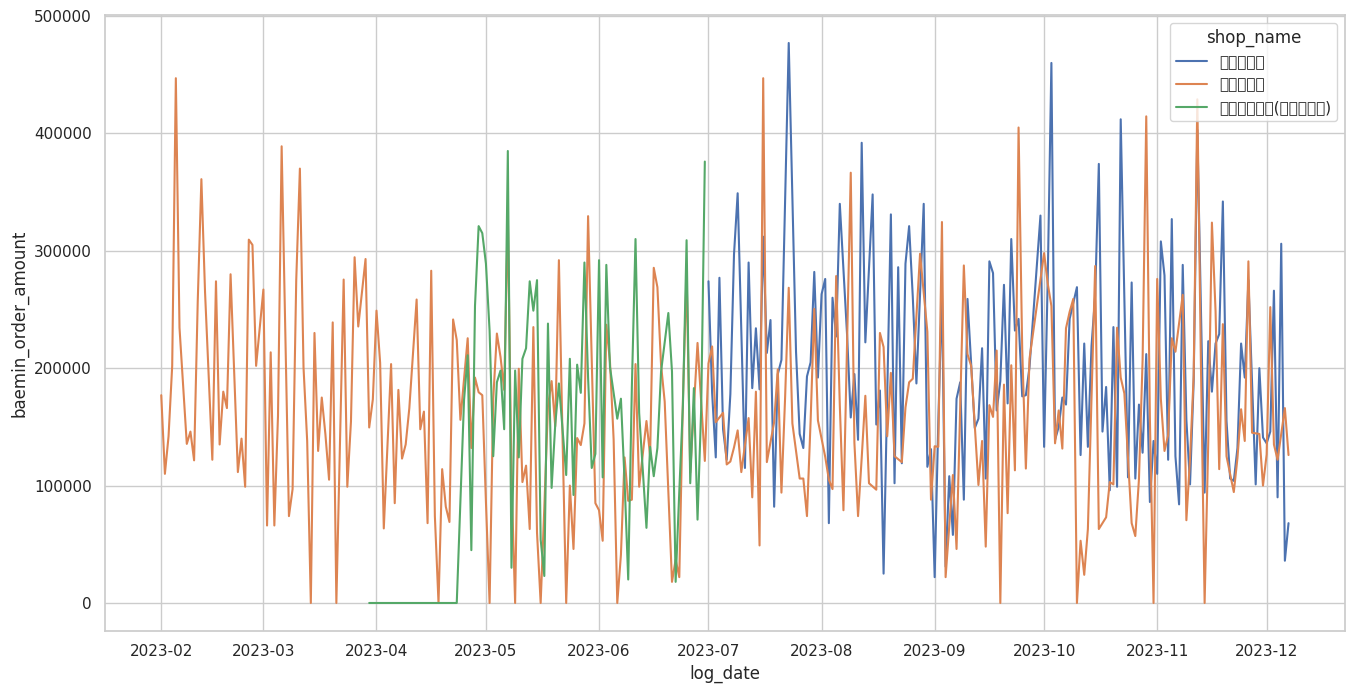

In [21]:
evaluationreport.timeseries_plot(evaluationreport.dataset, evaluationreport.config)

## Train asset
----

In [7]:
%%capture --no-display
cv_result_dict, cv_score_df = wrapper.get_train_asset_output();
train_asset_structure = copy(bizpreprocess_asset_structure)
evaluationreport = EvaluationReport(asset_structure=train_asset_structure)
evaluationreport.config['metric_to_compare'] = 'mae'
evaluationreport.config.update(wrapper.pipeline.get_parameter('train'))

### CV별 평가 점수 비교 시각화

Groupkey의 종류가 많은 경우에는 chart_type을 'box'로 변경해주세요.

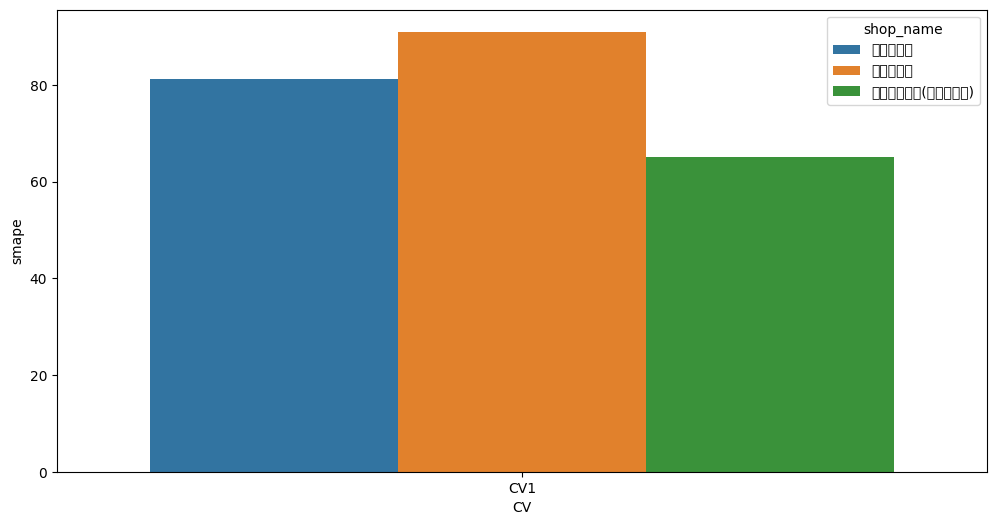

In [9]:
evaluationreport.train_cv_score_plot(evaluationreport.config,
                                     cv_score_df,
                                     chart_type='bar')

### CV별 실제 값과 예측 값 비교 시각화

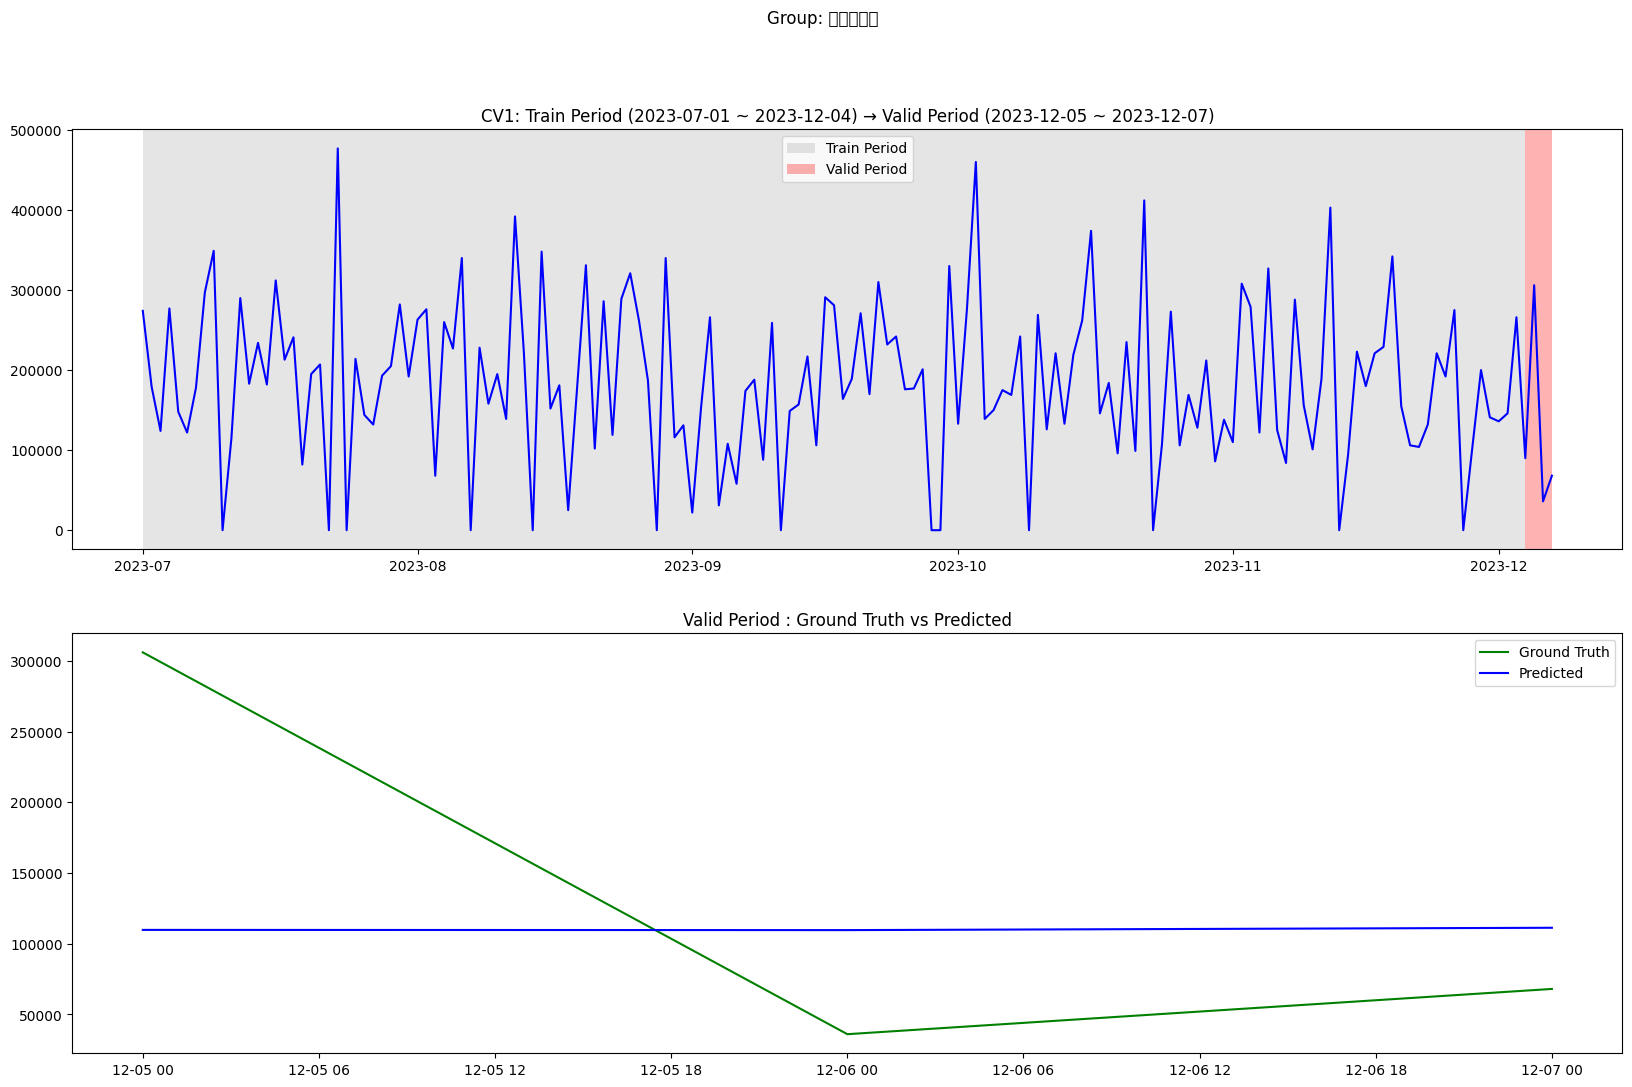

In [10]:
evaluationreport.train_cv_prediction_plot(evaluationreport.config,
                                          cv_result_dict,
                                          cv_score_df,
                                          cv='CV1',
                                          groupkey='여수웅천점')

# Inference pipeline


In [3]:
%%capture --no-display
pipeline = 'inference_pipeline'
wrapper.run_inference_pipeline();
inference_prediction_df = wrapper.get_inference_asset_output();
input_asset_structure = wrapper.get_asset_structure(step=0, pipeline=pipeline);
readiness_asset_structure = wrapper.get_asset_structure(step=1, pipeline=pipeline);
bizpreprocess_asset_structure = wrapper.get_asset_structure(step=2, pipeline=pipeline);

## inference asset
----

In [4]:
inference_asset_structure = copy(bizpreprocess_asset_structure)
evaluationreport = EvaluationReport(asset_structure=inference_asset_structure)

### 예측 결과 살펴보기

In [5]:
inference_prediction_df

,timestamp,targetdate,baemin_order_amount,shop_name
0,2023-12-07,2023-12-08,118236.184341,여수웅천점
1,2023-12-07,2023-12-09,124267.573198,여수웅천점
2,2023-12-07,2023-12-10,131779.288747,여수웅천점
3,2023-12-07,2023-12-08,98671.779773,전남여수점
4,2023-12-07,2023-12-09,110219.552439,전남여수점
5,2023-12-07,2023-12-10,106499.234172,전남여수점
6,2023-06-30,2023-07-01,150513.320744,킹콩부대찌개(여수웅천점)
7,2023-06-30,2023-07-02,166642.793539,킹콩부대찌개(여수웅천점)
8,2023-06-30,2023-07-03,154412.228431,킹콩부대찌개(여수웅천점)


### 예측 결과 시각화

In [10]:
use_columns = [evaluationreport.config['time_column'], evaluationreport.config['y_column']]
if (evaluationreport.config['groupkey_column'] != '') | (evaluationreport.config['groupkey_column'] is not None):
    use_columns = use_columns + [evaluationreport.config['groupkey_column']]
evaluationreport.dataset = evaluationreport.dataset.loc[:, use_columns]
evaluationreport.dataset.columns = ['targetdate'] + list(evaluationreport.dataset.columns)[1:]

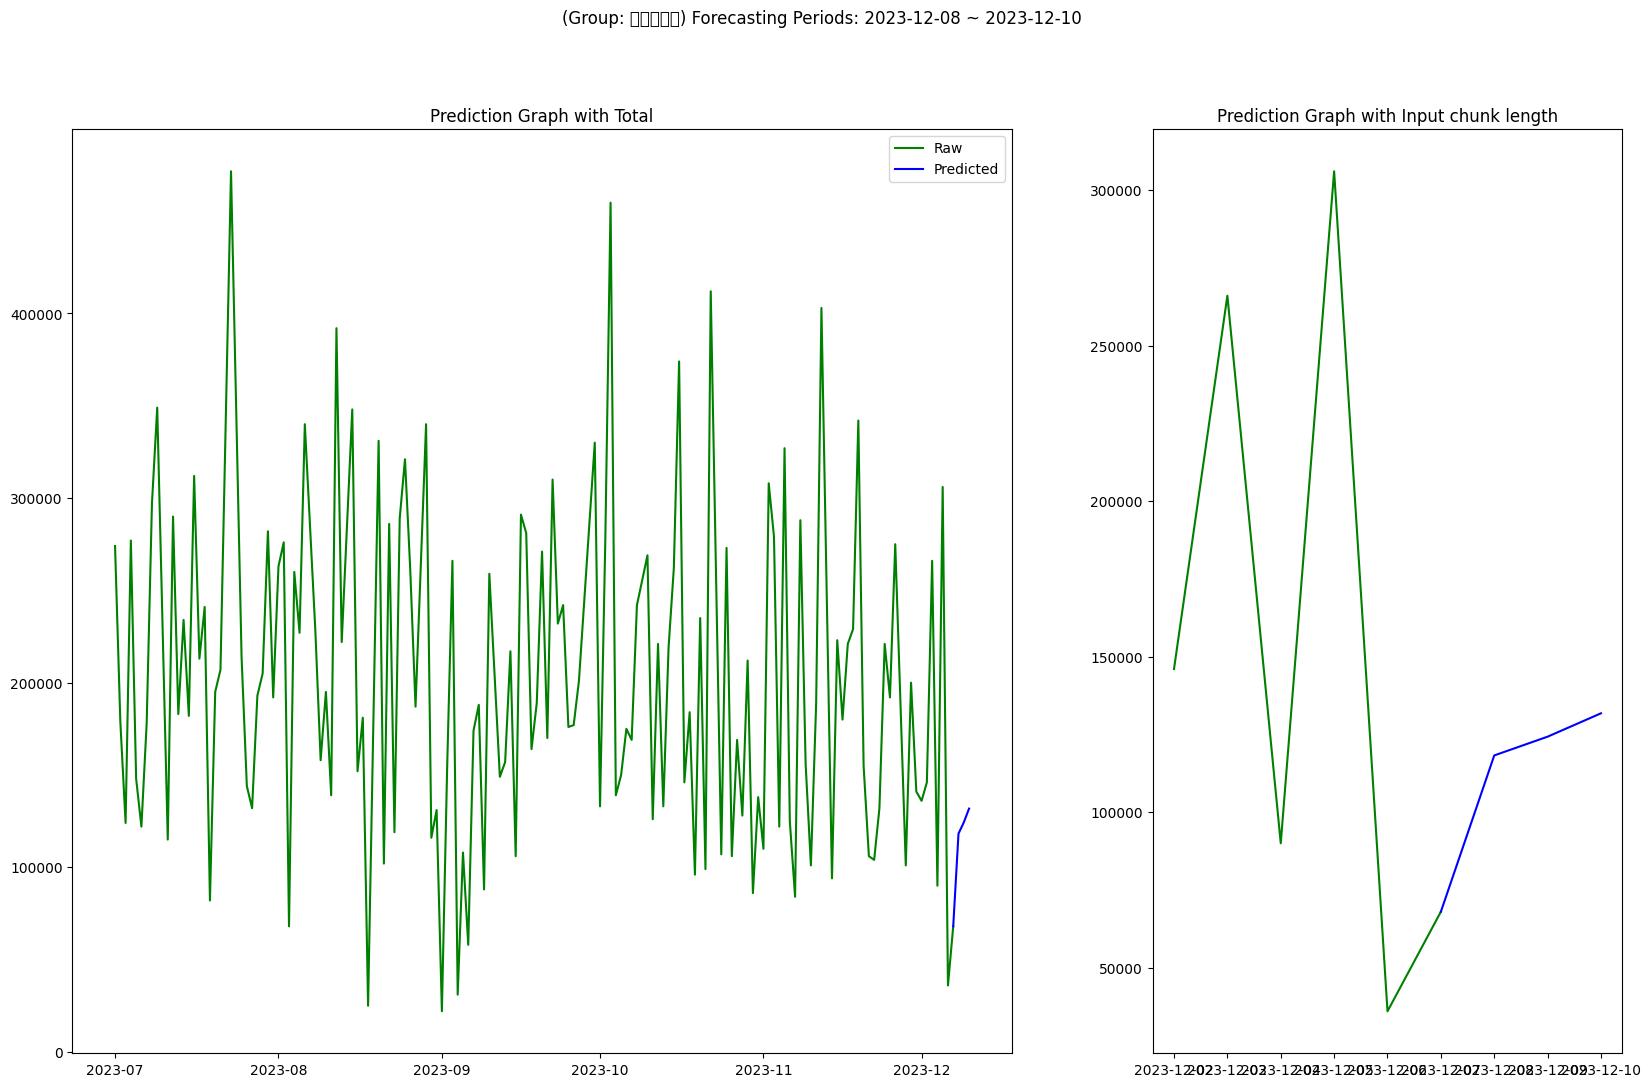

In [11]:
evaluationreport.inference_prediction_plot(evaluationreport.dataset,
                                           evaluationreport.config,
                                           inference_prediction_df,
                                           groupkey='여수웅천점')